In [1]:
pip install fuzzywuzzy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC

In [3]:
bankdata = pd.read_csv('D:/bank data/Bank Data.csv')
bankdata.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bankdata.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [5]:
bankdata.shape

(41188, 21)

In [6]:
bankdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [7]:
bankdata.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
bankdata.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


In [9]:
bankdata['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [10]:
len(bankdata['job'].value_counts())

12

In [11]:
bankdata['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [12]:
len(bankdata['education'].value_counts())

8

In [13]:
bankdata.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [14]:
bankdata['y'].unique()

array(['no', 'yes'], dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()

In [17]:
for col in bankdata.columns:
          bankdata[col]=le.fit_transform(bankdata[col])


In [18]:
bankdata.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,39,3,1,0,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
1,40,7,1,3,1,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
2,20,7,1,3,0,2,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
3,23,0,1,1,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
4,39,7,1,3,0,0,2,1,6,1,...,0,26,0,1,8,18,16,287,8,0


In [19]:
X=bankdata.drop('y',axis=1)

In [20]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,39,3,1,0,0,0,0,1,6,1,261,0,26,0,1,8,18,16,287,8
1,40,7,1,3,1,0,0,1,6,1,149,0,26,0,1,8,18,16,287,8
2,20,7,1,3,0,2,0,1,6,1,226,0,26,0,1,8,18,16,287,8
3,23,0,1,1,0,0,0,1,6,1,151,0,26,0,1,8,18,16,287,8
4,39,7,1,3,0,0,2,1,6,1,307,0,26,0,1,8,18,16,287,8


In [21]:
Y=bankdata['y']

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler=StandardScaler()

In [24]:
X=scaler.fit_transform(X)

In [25]:
print(X)

[[ 1.5334083  -0.20157925 -0.2837415  ...  0.94739573  0.45678474
   0.0628044 ]
 [ 1.62938803  0.91122681 -0.2837415  ...  0.94739573  0.45678474
   0.0628044 ]
 [-0.29020655  0.91122681 -0.2837415  ...  0.94739573  0.45678474
   0.0628044 ]
 ...
 [ 1.5334083   0.35482378 -0.2837415  ... -1.72870087 -1.23257369
  -3.19614084]
 [ 0.38165155  1.46762984 -0.2837415  ... -1.72870087 -1.23257369
  -3.19614084]
 [ 3.26104342  0.35482378 -0.2837415  ... -1.72870087 -1.23257369
  -3.19614084]]


Text(0, 0.5, 'age')

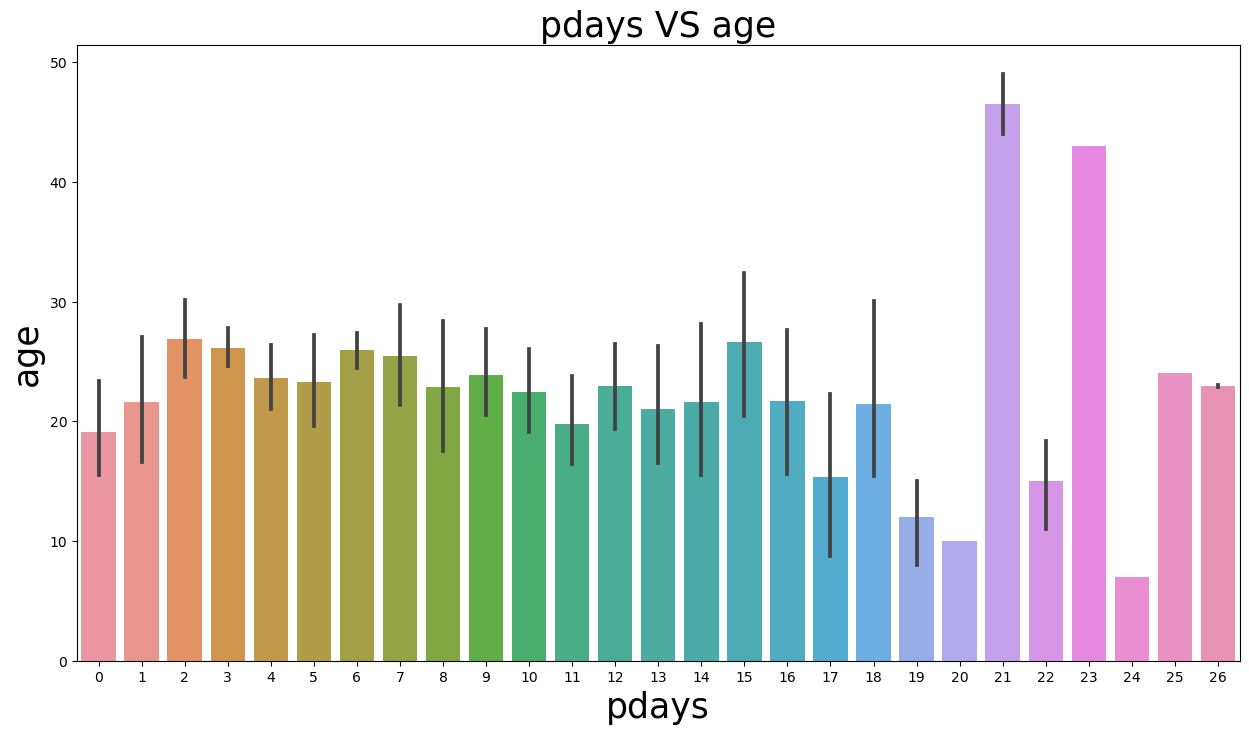

In [26]:
plt.figure(figsize=(15,8))
sns.barplot(bankdata['pdays'],bankdata['age'])
plt.title('pdays VS age' ,fontsize=25)
plt.xlabel('pdays',fontsize=25)
plt.ylabel('age',fontsize = 25)

Text(0, 0.5, 'job')

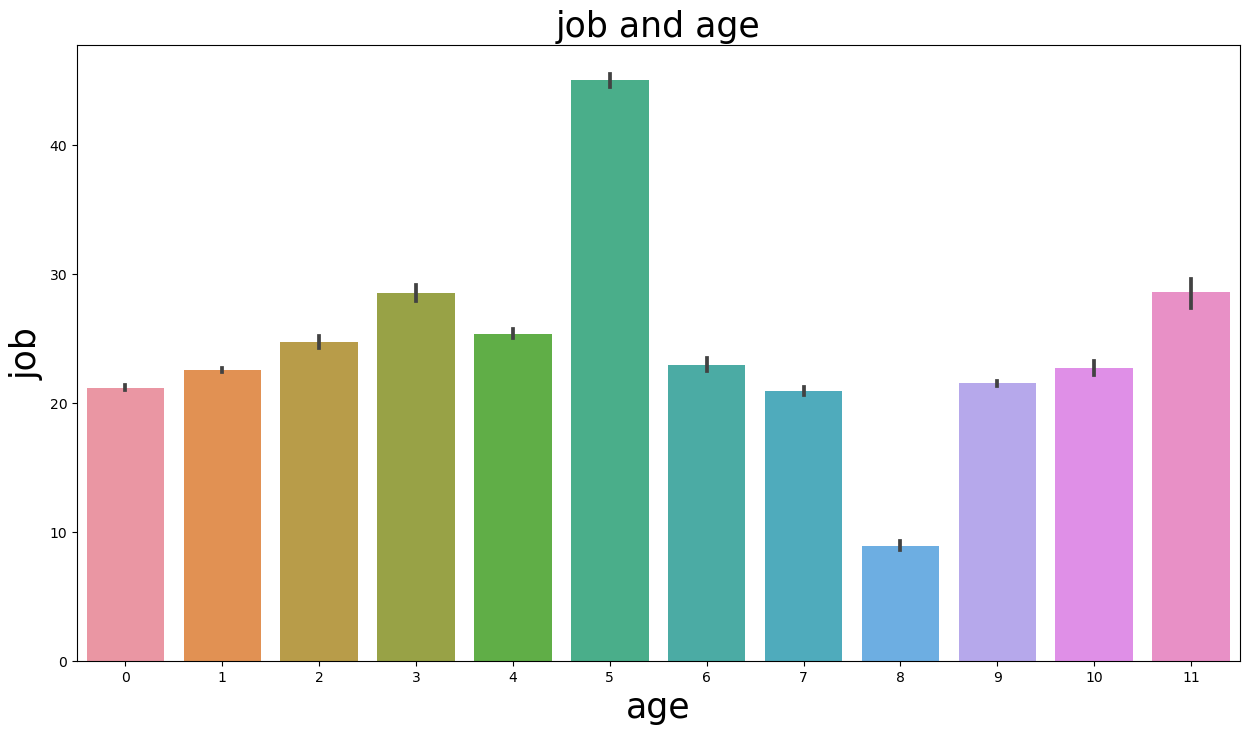

In [27]:
plt.figure(figsize=(15,8))
sns.barplot(bankdata['job'],bankdata['age'])
plt.title('job and age',fontsize=25)
plt.xlabel('age',fontsize=25)
plt.ylabel('job',fontsize = 25)

Text(0, 0.5, 'emp.var.rate')

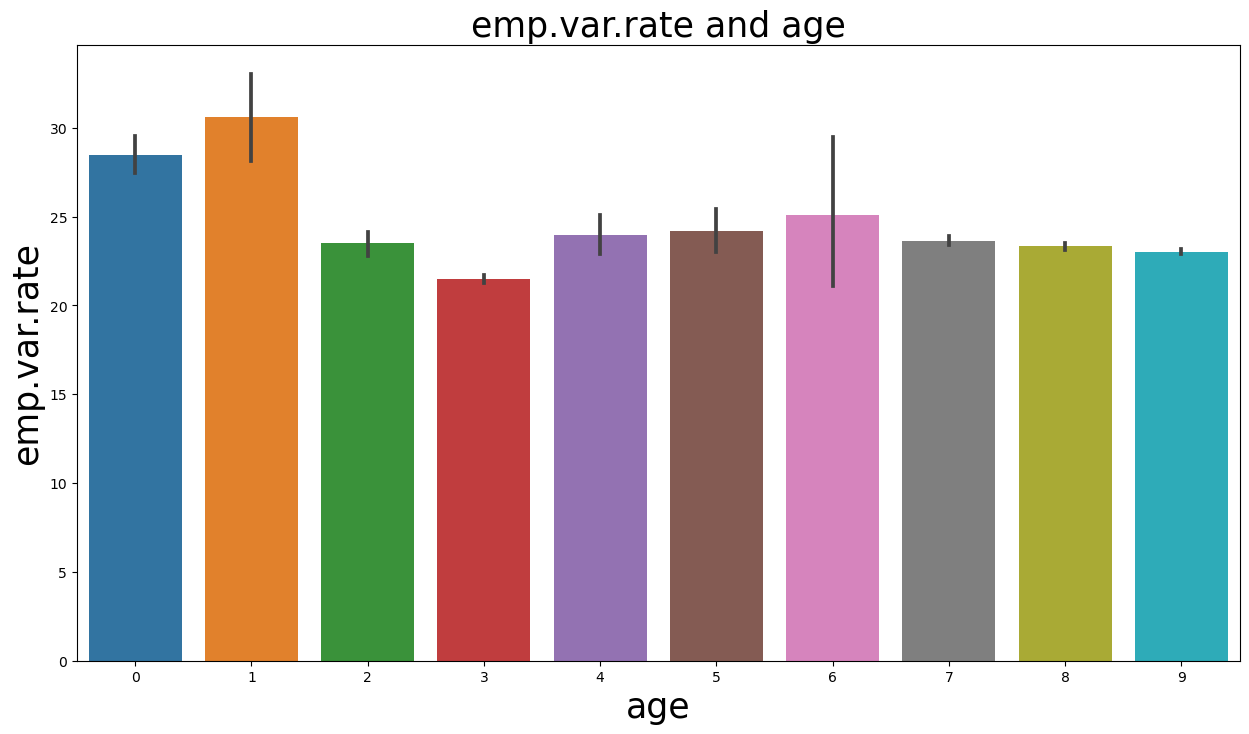

In [29]:
plt.figure(figsize=(15,8))
sns.barplot(bankdata['emp.var.rate'],bankdata['age'])
plt.title('emp.var.rate and age',fontsize=25)
plt.xlabel('age',fontsize=25)
plt.ylabel('emp.var.rate',fontsize = 25)

In [30]:
#Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=15)

In [33]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [34]:
predictions = logmodel.predict(X_test)
X_test

array([[-0.48216601, -1.03618379, -0.2837415 , ..., -1.05967672,
        -0.6500363 , -0.75193191],
       [ 0.47763128,  0.07662227, -0.2837415 , ..., -0.72516465,
         0.66067283,  0.87754071],
       [-0.0982471 , -0.75798228, -1.92606089, ..., -1.05967672,
        -0.70829004, -0.75193191],
       ...,
       [-0.57814574,  1.46762984,  1.3585779 , ...,  1.11465177,
         0.76261687,  0.87754071],
       [-0.67412547, -0.75798228, -0.2837415 , ..., -1.05967672,
        -0.6500363 , -0.75193191],
       [-0.67412547, -0.75798228, -0.2837415 , ..., -0.22339653,
        -0.79567065, -1.15930006]])

In [35]:
accuracy=logmodel.score(X_test,y_test)
print(accuracy*100,'%')

90.8837096382617 %


In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7292
           1       0.66      0.42      0.52       946

    accuracy                           0.91      8238
   macro avg       0.79      0.70      0.73      8238
weighted avg       0.90      0.91      0.90      8238



In [37]:
confusion_matrix(y_test,predictions)

array([[7086,  206],
       [ 545,  401]], dtype=int64)

In [38]:
#Support Vector Classifier

In [39]:
logmodel = SVC()
logmodel.fit(X_train,y_train)

SVC()

In [40]:
SVC_prediction = logmodel.predict(X_test)
X_test

array([[-0.48216601, -1.03618379, -0.2837415 , ..., -1.05967672,
        -0.6500363 , -0.75193191],
       [ 0.47763128,  0.07662227, -0.2837415 , ..., -0.72516465,
         0.66067283,  0.87754071],
       [-0.0982471 , -0.75798228, -1.92606089, ..., -1.05967672,
        -0.70829004, -0.75193191],
       ...,
       [-0.57814574,  1.46762984,  1.3585779 , ...,  1.11465177,
         0.76261687,  0.87754071],
       [-0.67412547, -0.75798228, -0.2837415 , ..., -1.05967672,
        -0.6500363 , -0.75193191],
       [-0.67412547, -0.75798228, -0.2837415 , ..., -0.22339653,
        -0.79567065, -1.15930006]])

In [41]:
SVC_accuracy=logmodel.score(X_test,y_test)
print(accuracy*100,'%')

90.8837096382617 %


In [42]:
SVC_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
print(classification_report(y_test,SVC_prediction))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7292
           1       0.68      0.40      0.51       946

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



In [44]:
confusion_matrix(y_test,SVC_prediction)

array([[7113,  179],
       [ 564,  382]], dtype=int64)

In [45]:
#Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion = 'entropy', random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [47]:
Y_pred=classifier.predict(X_test)

In [48]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
cm=confusion_matrix(y_test,Y_pred)
print(cm)
accuracy_score(y_test,Y_pred)

[[6823  469]
 [ 446  500]]


NameError: name 'accuracy_score' is not defined